<a href="https://colab.research.google.com/github/Kaliruo/Abeilles/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 86 kB 2.0 MB/s 
     |████████████████████████████████| 1.1 MB 8.6 MB/s 
     |████████████████████████████████| 15.8 MB 16.1 MB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
     |████████████████████████████████| 802 kB 59.9 MB/s 
     |████████████████████████████████| 132 kB 72.0 MB/s 
     |████████████████████████████████| 793 kB 20.9 MB/s 
     |████████████████████████████████| 793 kB 53.8 MB/s 
     |████████████████████████████████| 791 kB 37.6 MB/s 
     |████████████████████████████████| 786 kB 33.4 MB/s 
     |████████████████████████████████| 779 kB 47.6 MB/s 
     |████████████████████████████████| 778 kB 59.9 MB/s 
     |████████████████████████████████| 776 kB 73.8 MB/s 
     |████████████████████████████████| 769 kB 32.8 MB/s 
     |████████████████████████████████| 766 kB 23.2 MB/s 
     |████████████████████████████████| 1.0 MB 59.9 MB/s 
     |████████████████████████████████| 722 kB 41.4 MB/s 
     |████████████

In [ ]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle 
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import copy


# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# TensorFlow et keras
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm
from keras.models import load_model
from keras.datasets import mnist


# Umap 
import umap.plot

In [ ]:
def plot_curves_confusion (history,confusion_matrix,class_names):
  plt.figure(1,figsize=(16,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)

  # division de la fenêtre graphique en 1 ligne, 3 colonnes,
  # graphique en position 1 - loss fonction

  plt.subplot(1,3,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Training loss', 'Validation loss'], loc='upper left')
  # graphique en position 2 - accuracy
  plt.subplot(1,3,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
  
  # matrice de correlation
  plt.subplot(1,3,3)
  sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)# label=class_names)
  # labels, title and ticks
  plt.xlabel('Predicted', fontsize=12)
  #plt.set_label_position('top') 
  #plt.set_ticklabels(class_names, fontsize = 8)
  #plt.tick_top()
  plt.title("Correlation matrix")
  plt.ylabel('True', fontsize=12)
  #plt.set_ticklabels(class_names, fontsize = 8)
  plt.show()

In [ ]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import sys
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd


/content/gdrive/My Drive/Colab Notebooks


'/content/gdrive/My Drive/Colab Notebooks'

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Nombre d'exemples du jeu d'apprentissage :  60000
Format du jeu d'apprentissage :  (60000, 28, 28)
Format des labels pour le jeu d'apprentissage' :  (60000,) 

Nombre d'exemples du jeu de test :  10000
Nombre de features du jeu de test :  28
Format des labels pour le jeu de test :  (10000,) 

Exemple de labels 5 

Distribution des labels dans le jeu d'apprentissage


Text(0.5, 1.0, "Nombre d'éléments par classe")

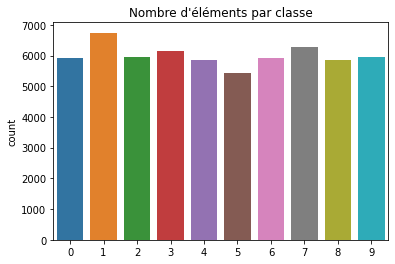

In [ ]:
print("Nombre d'exemples du jeu d'apprentissage : ", train_images.shape[0])
print ("Format du jeu d'apprentissage : ", train_images.shape)
print("Format des labels pour le jeu d'apprentissage' : ", train_labels.shape, '\n')
print("Nombre d'exemples du jeu de test : ", test_images.shape[0])
print ("Nombre de features du jeu de test : ", test_images.shape[1])
print("Format des labels pour le jeu de test : ", test_labels.shape, '\n')
print ("Exemple de labels",train_labels[0], '\n')
print ("Distribution des labels dans le jeu d'apprentissage")
sns.countplot(np.array(train_labels))
plt.title("Nombre d'éléments par classe")

In [ ]:
print("Création d'une classe pour pouvoir labéliser les images lors de l'affichage")
class_names = ["0","1","2","3","4","5","6","7","8","9"]

Création d'une classe pour pouvoir labéliser les images lors de l'affichage


taille de train labels 60000
taille de class name 10


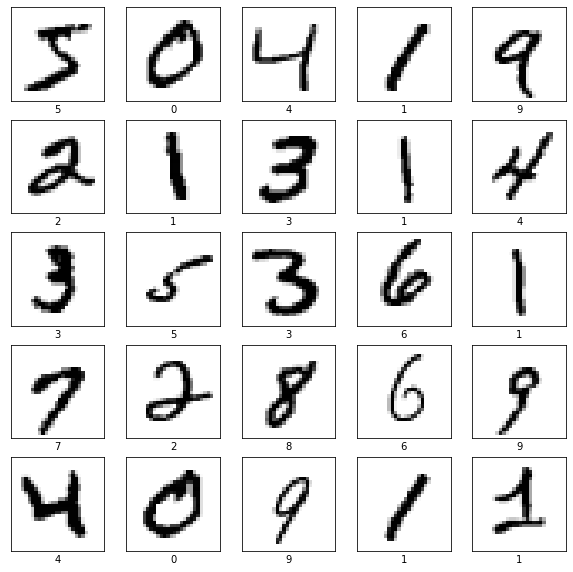

In [13]:
plt.figure(figsize=(10,10))
columns = 25
print("taille de train labels",len(train_labels))
print("taille de class name",len(class_names))

for i in range(columns):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [16]:
nb_images_ftest = 3000
print("Formes de jeu données à visualiser", train_images[:nb_images_ftest].shape)
train_images_reshaped = train_images[:nb_images_ftest].reshape((nb_images_ftest,28*28))
print("Formes de jeu de données à visualiser après reshape",train_images_reshaped[:nb_images_ftest].shape) 

x_plot = train_images_reshaped[:nb_images_ftest]
y_plot = train_labels[:nb_images_ftest]

label_dictionnary = {
    0 : "0",
    1 : "1",
    2 : "2",
    3 : "3",
    4 : "4",
    5 : "5",
    6 : "6",
    7 : "7",
    8 : "8",
    9 : "9",
}

def true_label(x):
  return label_dictionnary[x]

Target_names=[]
for i in range(0,nb_images_ftest):
 Target_names=np.append(Target_names,true_label(y_plot[i]))

Formes de jeu données à visualiser (3000, 28, 28)
Formes de jeu de données à visualiser après reshape (3000, 784)


#Visualisation des données avec T-NSE

In [19]:
# Utilisation de TSNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(x_plot)
traceTSNE = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    text = Target_names,
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 8,
        color = y_plot,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
            ),
        opacity = 0.8
    )
)
data = [traceTSNE]
layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,
              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

#Pré-traitement des donnés pour le réseaux

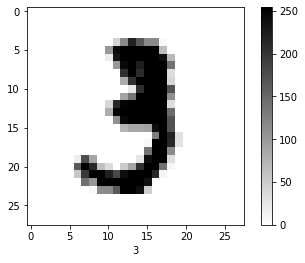

In [24]:
#Visualisation d'une image pour le pré-traitement :
image_vis=10
plt.figure()
plt.imshow(train_images[image_vis], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[image_vis]])
plt.show()


#Normalisation des données 

In [28]:
train_images_original  =copy.deepcopy(train_images)
test_images_original = copy.deepcopy(test_images)

train_images = train_images / 255.0
test_images = test_images / 255.0

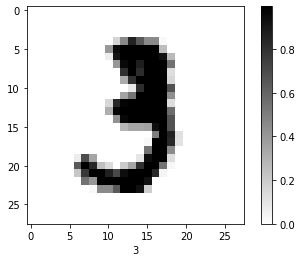

In [29]:
image_vis=10
plt.figure()
plt.imshow(train_images[image_vis], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[image_vis]])
plt.show()